<a href="https://colab.research.google.com/github/d22cs051/Leaning-DL/blob/main/pytorch_exercises/Copy_of_03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Jan 11 16:00:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    30W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [27]:
# Import torch
import torch
import matplotlib.pyplot as plt

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'

device

1.13.0+cu116


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
# importing torch vision
import torchvision

# downloading torchvision data (MNIST) both train & test
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True
)


test_data = torchvision.datasets.MNIST(
    root = 'data',
    train = False,
    transform = torchvision.transforms.ToTensor(),
    download = True
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

total datapoints in train samples: 60000,
total datapoints in  in test_samples: 10000


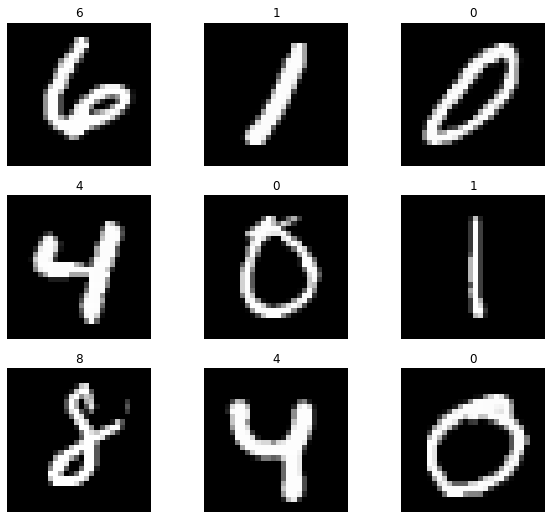

In [4]:
import matplotlib.pyplot as plt
import numpy as np

train_samples = len(train_data)
test_samples = len(test_data)
print(f"total datapoints in train samples: {train_samples},\ntotal datapoints in  in test_samples: {test_samples}")

plt.figure(figsize=(10,9))

rows,cols = 3,3
for i in range(rows*cols):
  index = np.random.randint(low=0,high=train_samples)
  image, target = train_data[index]
  plt.subplot(rows,cols,i+1)
  plt.title(target)
  plt.imshow(image.squeeze(),cmap='gray')
  plt.axis(False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [5]:
BATCH_SIZE = 32
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle=True
)

print(f"length of train data loaders: {len(train_dataloader)} of batch: {BATCH_SIZE}")
print(f"length of test data loaders: {len(test_dataloader)} of batch: {BATCH_SIZE}")

length of train data loaders: 1875 of batch: 32
length of test data loaders: 313 of batch: 32


In [6]:
train_features_batch, train_label_batch = next(iter(train_dataloader))
train_features_batch.shape,train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [9]:
from torch import nn

class MNISTModelV0(nn.Module):
  def __init__(self,in_shape:int ,hidden_units:int ,out_shape:int ) -> None:
    super().__init__()
    self.conv_block_0 = nn.Sequential(
        nn.Conv2d(in_channels=in_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
        out_channels = hidden_units,
        kernel_size =3,
        stride=1,
        ),
        nn.ReLU(),
        nn.MaxPool2d(
            kernel_size= 2
        )
    )

    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.clf_block = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*4*4,out_features=out_shape),
    )

  def forward(self,x:torch.Tensor):
    x = self.conv_block_0(x)
    # print(x.shape)
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.clf_block(x)
    # print(x)
    return x

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [14]:
# traning step
def train(model:nn.Module,
          data_loader: torch.utils.data.DataLoader,
          loss_fn: nn.Module,
          optimizer: torch.optim,
          accuracy_fn,
          device:torch.device
          ):
  # loop into data loaders
  model.train()
  train_loss, train_acc = 0, 0
  for batch, (X,y) in enumerate(data_loader):
    X,y = X.to(device),y.to(device)
    
    # forward pass
    y_preds = model(X)

    # calculate the loss
    loss = loss_fn(y_preds,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                            y_pred=y_preds.argmax(dim=1))
    # optimizer zero grad
    optimizer.zero_grad()

    # backprop
    loss.backward()

    # optimizer step
    optimizer.step()

    

  print(f"train_loss:{train_loss/len(data_loader)} | train_accuracy: {train_acc/len(data_loader)}")


In [15]:
def test(model:nn.Module,
         data_loader:torch.utils.data.DataLoader,
         loss_fn:nn.Module,
         accuracy_fn,
         device:torch.device
         ):
  test_loss,acc = 0,0
  model.eval()
  with torch.inference_mode():
    for (X,y) in data_loader:
      X,y = X.to(device),y.to(device)
      y_preds = model(X)
      loss = loss_fn(y_preds,y)
      test_loss += loss
      acc += accuracy_fn(y_true = y,
                         y_pred = y_preds.argmax(dim=1))
    print(f"test_loss: {test_loss/len(data_loader)} | test_accuracy: {acc/len(data_loader)}")


In [10]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [17]:
from timeit import default_timer as timer
from tqdm.auto import tqdm

# traning loop function
def train_model(model,device,epochs,train_data,test_data,optimizer,lossfn,accuracy_fn):
  # loop for epochs
  tic = timer()
  for epoch in tqdm(range(1,epochs+1)):
    print(f"epoch: {epoch}")
    # traning
    train(model=model,data_loader=train_dataloader,loss_fn=lossfn,accuracy_fn=accuracy_fn,optimizer=optimizer,device=device)
    # testing
    test(model=model,data_loader=test_dataloader,loss_fn=lossfn,accuracy_fn=accuracy_fn,device=device)
    print()
  toc = timer()

  print(f"time using the device: {device} | time: {(toc-tic):.3f} sec")
    


In [19]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [13]:
from torch.optim import optimizer
from helper_functions import accuracy_fn
# making instance of the model
model_0 = MNISTModelV0(1, 10, 10)
model_0.to(device)
# model_info
# print(model_0)17

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)
epochs = 5

# traing and testing
train_model(model_0,device,epochs,train_dataloader,test_dataloader,optimizer,loss_fn,accuracy_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

epoch: 1
train_loss:0.33109143376350403 | train_accuracy: 88.85666666666667
test_loss: 0.0793246477842331 | test_accuracy: 97.59384984025559

epoch: 2
train_loss:0.08461318165063858 | train_accuracy: 97.38833333333334
test_loss: 0.08383841067552567 | test_accuracy: 97.37420127795527

epoch: 3
train_loss:0.06910675764083862 | train_accuracy: 97.835
test_loss: 0.06079326942563057 | test_accuracy: 97.82348242811501

epoch: 4
train_loss:0.05963488295674324 | train_accuracy: 98.16166666666666
test_loss: 0.056176573038101196 | test_accuracy: 98.3226837060703

epoch: 5
train_loss:0.05371313542127609 | train_accuracy: 98.27166666666666
test_loss: 0.04703895375132561 | test_accuracy: 98.46246006389777

time using the device: cuda | time: 71.381 sec


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [14]:
classes = test_dataloader.dataset.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [15]:
# making preddiction list
pred_list = []
label_list = []
img_list = []
model_0.eval()
with torch.inference_mode():
  for (X,y) in test_dataloader:
    X,y = X.to(device),y.to(device)
    # print(X.shape,X.dtype)
    y_preds = model_0(X)
    img_list.extend(X)
    pred_list.extend(y_preds.argmax(dim=1))
    label_list.extend(y)

  print("element from img_list shape:",img_list[0].shape)
  print("pred_list:",pred_list[:5])
  print("label_list:",label_list[:5])

element from img_list shape: torch.Size([1, 28, 28])
pred_list: [tensor(3, device='cuda:0'), tensor(9, device='cuda:0'), tensor(3, device='cuda:0'), tensor(4, device='cuda:0'), tensor(7, device='cuda:0')]
label_list: [tensor(3, device='cuda:0'), tensor(9, device='cuda:0'), tensor(3, device='cuda:0'), tensor(4, device='cuda:0'), tensor(7, device='cuda:0')]


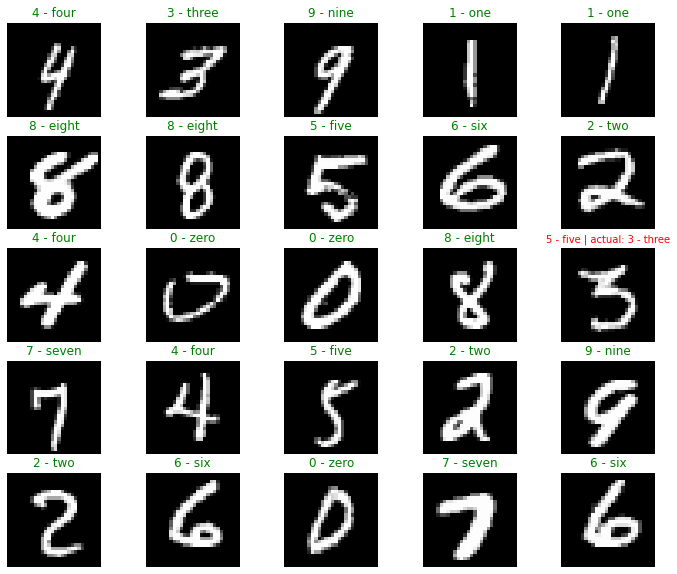

In [16]:
# torch.manual_seed(42)
plt.figure(figsize = (12,10))

r,c = 5,5
index = torch.randint(0,len(img_list),(r*c,))
# print(index)
for i in range(0,r*c):
  plt.subplot(r,c,i+1)
  if pred_list[index[i]] == label_list[index[i]]:
    plt.title(classes[pred_list[index[i]]],color="green",fontdict={"fontsize":12})
  else:
    plt.title(classes[pred_list[index[i]]]+" | actual: "+classes[label_list[index[i]]],color="red",fontdict={"fontsize":10})
  plt.imshow(img_list[index[i]].squeeze().cpu(),cmap="gray")
  plt.axis(False)
plt.show()
  
  

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [2]:
# installing torchmetrics if not avilable
try:
  import torchmetrics
except:
  !pip -q install torchmetrics
  import torchmetrics

In [18]:
# computing confusion matrix
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(task='multiclass',num_classes=len(classes))

mat = confmat(torch.tensor(pred_list),torch.tensor(label_list))
print(mat)

tensor([[ 972,    0,    1,    0,    0,    0,    4,    2,    1,    0],
        [   0, 1128,    1,    2,    1,    1,    1,    1,    0,    0],
        [   1,    3, 1016,    2,    0,    0,    1,    6,    2,    1],
        [   0,    0,    1,  991,    0,    9,    0,    6,    1,    2],
        [   1,    0,    2,    0,  967,    0,    3,    2,    2,    5],
        [   1,    0,    1,    2,    0,  880,    3,    1,    1,    3],
        [   1,    3,    0,    1,    2,    3,  947,    0,    1,    0],
        [   0,    4,    8,    1,    0,    0,    0, 1014,    0,    1],
        [   3,    0,    4,    0,    1,    7,    2,    7,  940,   10],
        [   0,    3,    0,    0,    6,    5,    0,    4,    0,  991]])


In [1]:
import mlxtend

if int(str(mlxtend.__version__).split(".")[1]) >=19:
  print(f"mlxtend verion: {mlxtend.__version__}, good to go")
else:
  print("updating mlxtend")
  !pip -q install -U mlxtend
  print(f"mlxtend verion: {mlxtend.__version__}, UPDATED!!")

mlxtend verion: 0.21.0, good to go


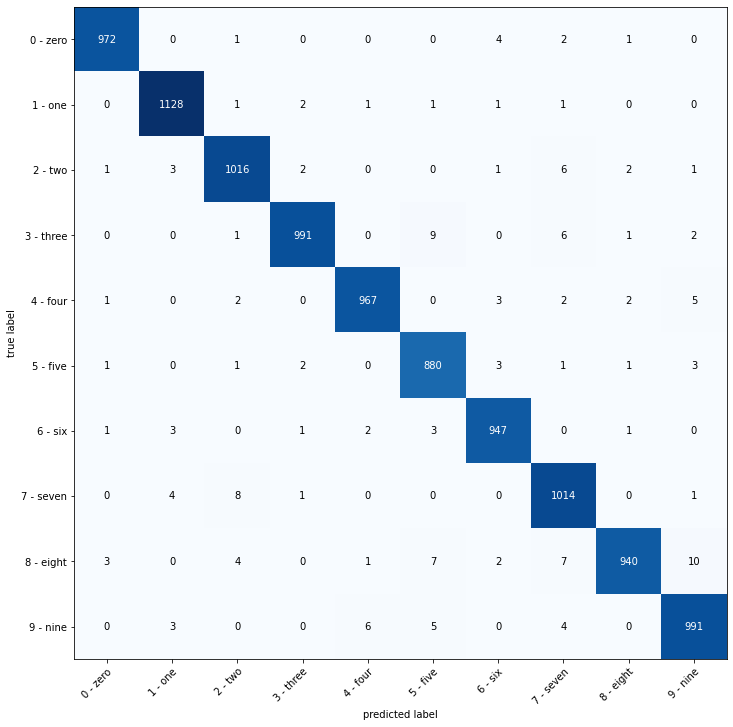

In [20]:
# plotting confusion matrix 
from mlxtend.plotting import plot_confusion_matrix


fig, ax = plot_confusion_matrix(
    conf_mat=mat.numpy(),
    class_names=classes,
    figsize=(12,12))

plt.show()

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [31]:
# making radom tensor
random_tensor = torch.rand(size=(1,3,64,64))
random_tensor.shape

# making conv_2d layer
def conv2d_forward_pass(in_ch:int, out_ch:int, k:int, s:int,x:torch.Tensor):
  conv_layer = nn.Conv2d(
      in_channels=in_ch,
      out_channels=out_ch,
      kernel_size=k,
      stride=s
  )

  return conv_layer(x)

# testing fuction working
rand_sample_op = conv2d_forward_pass(3,10,3,1,random_tensor)
rand_sample_op.shape

torch.Size([1, 10, 62, 62])

In [33]:
kernel = [3,4,5,6]
stride = [1,2,3,4]
hparms = [(k,s) for k in kernel for s in stride]

for (k,s) in hparms:
  rand_sample_op_with_parms = conv2d_forward_pass(3,10,k,s,random_tensor)
  print(f"kernel_size: {k}, stride_size: {s}, output_tenosr_shape: {rand_sample_op_with_parms.shape}")

kernel_size: 3, stride_size: 1, output_tenosr_shape: torch.Size([1, 10, 62, 62])
kernel_size: 3, stride_size: 2, output_tenosr_shape: torch.Size([1, 10, 31, 31])
kernel_size: 3, stride_size: 3, output_tenosr_shape: torch.Size([1, 10, 21, 21])
kernel_size: 3, stride_size: 4, output_tenosr_shape: torch.Size([1, 10, 16, 16])
kernel_size: 4, stride_size: 1, output_tenosr_shape: torch.Size([1, 10, 61, 61])
kernel_size: 4, stride_size: 2, output_tenosr_shape: torch.Size([1, 10, 31, 31])
kernel_size: 4, stride_size: 3, output_tenosr_shape: torch.Size([1, 10, 21, 21])
kernel_size: 4, stride_size: 4, output_tenosr_shape: torch.Size([1, 10, 16, 16])
kernel_size: 5, stride_size: 1, output_tenosr_shape: torch.Size([1, 10, 60, 60])
kernel_size: 5, stride_size: 2, output_tenosr_shape: torch.Size([1, 10, 30, 30])
kernel_size: 5, stride_size: 3, output_tenosr_shape: torch.Size([1, 10, 20, 20])
kernel_size: 5, stride_size: 4, output_tenosr_shape: torch.Size([1, 10, 15, 15])
kernel_size: 6, stride_size:

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [6]:
import torchvision
import torch.nn as nn
import torch

# getting data with torch data
train_data = torchvision.datasets.FashionMNIST(
    root='data',
    download=True,
    train=True,
    transform=torchvision.transforms.ToTensor(),
)

test_data = torchvision.datasets.FashionMNIST(
    root='data',
    download=True,
    train=False,
    transform=torchvision.transforms.ToTensor(),
)

train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [7]:
# converting into data loaders
import os

BATCH_SIZE = 32
WORKERS = os.cpu_count()

# train dataloader
train_dataloader = torch.utils.data.DataLoader(
  dataset= train_data,
  batch_size = BATCH_SIZE,
  shuffle=True,
  num_workers = WORKERS
)

# test dataloader
test_dataloader = torch.utils.data.DataLoader(
  dataset= test_data,
  batch_size = BATCH_SIZE,
  num_workers = WORKERS
)

train_dataloader.dataset,test_dataloader.dataset

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [20]:
from helper_functions import accuracy_fn

# init model and device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_1 = MNISTModelV0(in_shape = 1,hidden_units=10,out_shape=10).to(device)

# init optim and loss fn
optimizer = torch.optim.SGD(params = model_1.parameters(),lr=0.1)
loss_fn = nn.CrossEntropyLoss()

# printing model
model_1

MNISTModelV0(
  (conv_block_0): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_1): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (clf_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=160, out_features=10, bias=True)
  )
)

In [21]:
# train model
EPOCH = 10

train_model(
    model = model_1,
    device = device,
    epochs = EPOCH,
    train_data = train_dataloader,
    test_data = test_dataloader,
    optimizer = optimizer,
    lossfn = loss_fn,
    accuracy_fn=accuracy_fn
)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch: 1
train_loss:0.6717149615287781 | train_accuracy: 75.38833333333334
test_loss: 0.4947388172149658 | test_accuracy: 81.4297124600639

epoch: 2
train_loss:0.42501792311668396 | train_accuracy: 84.56
test_loss: 0.411230206489563 | test_accuracy: 85.40335463258786

epoch: 3
train_loss:0.38085341453552246 | train_accuracy: 86.18833333333333
test_loss: 0.4540228843688965 | test_accuracy: 84.0155750798722

epoch: 4
train_loss:0.35934320092201233 | train_accuracy: 86.895
test_loss: 0.3934178054332733 | test_accuracy: 85.6729233226837

epoch: 5
train_loss:0.34535905718803406 | train_accuracy: 87.395
test_loss: 0.3593982756137848 | test_accuracy: 87.20047923322684

epoch: 6
train_loss:0.33101287484169006 | train_accuracy: 88.04833333333333
test_loss: 0.3354065418243408 | test_accuracy: 88.20886581469648

epoch: 7
train_loss:0.3255262076854706 | train_accuracy: 88.26833333333333
test_loss: 0.3770705461502075 | test_accuracy: 87.35023961661342

epoch: 8
train_loss:0.3164080083370209 | train

In [22]:
# getting targets
classes = train_dataloader.dataset.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [24]:
# making preddiction list
pred_list = []
label_list = []
img_list = []
model_1.eval()
with torch.inference_mode():
  for (X,y) in test_dataloader:
    X,y = X.to(device),y.to(device)
    # print(X.shape,X.dtype)
    y_preds = model_1(X)
    img_list.extend(X)
    pred_list.extend(y_preds.argmax(dim=1))
    label_list.extend(y)

  print("element from img_list shape:",img_list[0].shape)
  print("pred_list:",pred_list[:5])
  print("label_list:",label_list[:5])

element from img_list shape: torch.Size([1, 28, 28])
pred_list: [tensor(9, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(6, device='cuda:0')]
label_list: [tensor(9, device='cuda:0'), tensor(2, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(6, device='cuda:0')]


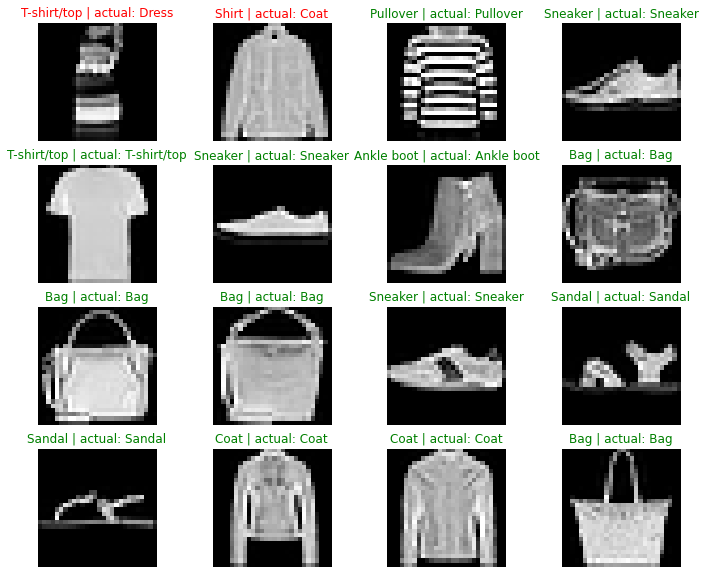

In [28]:
# torch.manual_seed(42)
plt.figure(figsize = (12,10))

r,c = 4,4
index = torch.randint(0,len(img_list),(r*c,))
# print(index)
for i in range(0,r*c):
  plt.subplot(r,c,i+1)
  if pred_list[index[i]] == label_list[index[i]]:
    plt.title(classes[pred_list[index[i]]]+" | actual: "+classes[label_list[index[i]]],color="green",fontdict={"fontsize":12})
  else:
    plt.title(classes[pred_list[index[i]]]+" | actual: "+classes[label_list[index[i]]],color="red",fontdict={"fontsize":12})
  plt.imshow(img_list[index[i]].squeeze().cpu(),cmap="gray")
  plt.axis(False)
plt.show()

In [30]:
# computing confusion matrix
from torchmetrics import ConfusionMatrix

confmat = ConfusionMatrix(task='multiclass',num_classes=len(classes))

mat = confmat(torch.tensor(pred_list),torch.tensor(label_list))
print(mat)

tensor([[847,   1,   7,  27,   2,   1,  96,   0,  19,   0],
        [  2, 965,   1,  22,   2,   0,   4,   0,   4,   0],
        [ 15,   1, 857,   9,  24,   0,  92,   0,   2,   0],
        [ 14,   3,  15, 921,  11,   0,  33,   0,   3,   0],
        [  0,   2, 103,  31, 658,   0, 201,   0,   5,   0],
        [  0,   0,   0,   0,   0, 964,   0,  21,   0,  15],
        [142,   1,  67,  30,  33,   0, 700,   0,  27,   0],
        [  0,   0,   0,   0,   0,  12,   0, 941,   2,  45],
        [  2,   0,   6,   1,   1,   1,  16,   2, 969,   2],
        [  0,   0,   0,   0,   0,   5,   0,  25,   2, 968]])


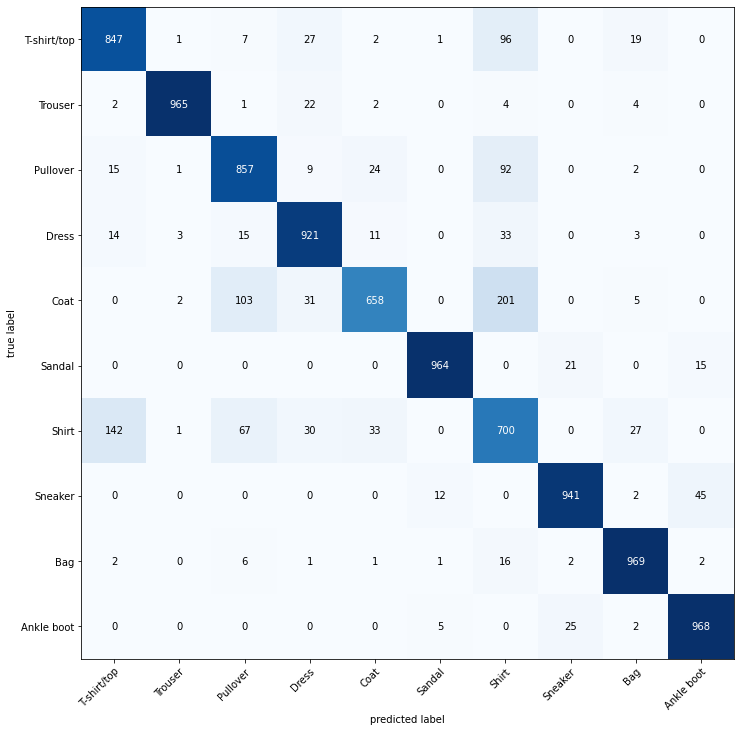

In [31]:
# plotting confusion matrix 
from mlxtend.plotting import plot_confusion_matrix


fig, ax = plot_confusion_matrix(
    conf_mat=mat.numpy(),
    class_names=classes,
    figsize=(12,12))

plt.show()